## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20)

In [3]:
y=-x+2

#### Plot your data points. 

Text(0, 0.5, 'y')

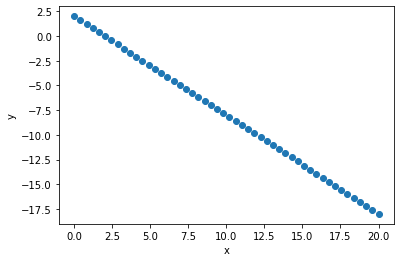

In [4]:
plt.plot(x,y,"o")
plt.xlabel("x")
plt.ylabel("y")

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
#vectorized implementation to Batch gradient Descent

def vectorized_Batch_Gradient_Descent(X,Y ,alpha=0.001,Max_number_iterations=100):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_number_iterations):
        print("==============================================================")
        print("epoch ",e)
        
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        theta_0 =theta_0 -alpha*Grad_theta_0

        theta_1= theta_1 -alpha *Grad_theta_1
        
        th0_list.append(theta_0)
        th1_list.append(theta_1)
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.001):
                break
        


    return Y_predict , theta_0 ,theta_1 , loss,th0_list,th1_list
    

In [6]:
Y_predict , theta_0 ,theta_1 , loss,th0_list,th1_list = vectorized_Batch_Gradient_Descent(x,y,0.001,1000)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  37.023388540217084
epoch  2
Cost=  27.81185904561304
epoch  3
Cost=  20.9264653263062
epoch  4
Cost=  15.779783564409968
epoch  5
Cost=  11.932733287565284
epoch  6
Cost=  9.057115918629986
epoch  7
Cost=  6.907613542504189
epoch  8
Cost=  5.300858881990897
epoch  9
Cost=  4.099790775722863
epoch  10
Cost=  3.201960399442214
epoch  11
Cost=  2.5307905412841367
epoch  12
Cost=  2.029042190260024
epoch  13
Cost=  1.653931020595576
epoch  14
Cost=  1.3734771203284524
epoch  15
Cost=  1.1637765304547414
epoch  16
Cost=  1.006961807909496
epoch  17
Cost=  0.8896776117745757
epoch  18
Cost=  0.801941252838415
epoch  19
Cost=  0.7362909909202433
epoch  20
Cost=  0.6871494144236727
epoch  21
Cost=  0.6503475869616842
epoch  22
Cost=  0.622769362213611
epoch  23
Cost=  0.6020855206832407
epoch  24
Cost=  0.5865550454484866
epoch  25
Cost=  0.5748765821549339
epoch  26
Cost=  0.5660774101228878
epoch  27
Cost=  0.559430451809235
epoch  28
Cost=  

In [8]:
r2_score(y,Y_predict)

0.9688589407729974

Text(0, 0.5, 'loss')

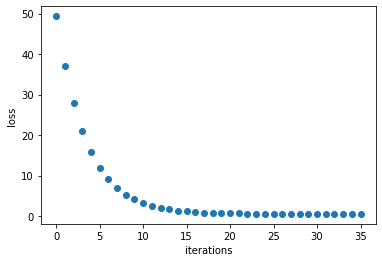

In [9]:
plt.plot(loss,"o")
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

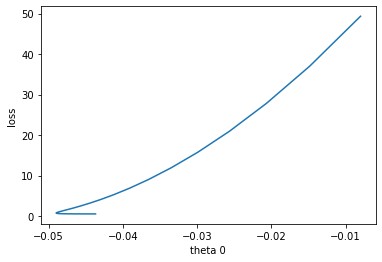

In [10]:
plt.plot(th0_list,loss)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

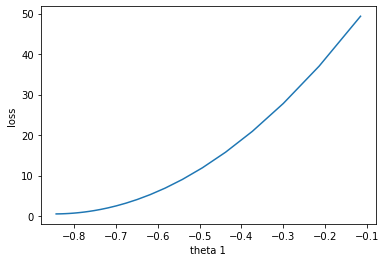

In [11]:
plt.plot(th1_list,loss)
plt.xlabel("theta 1")
plt.ylabel("loss")

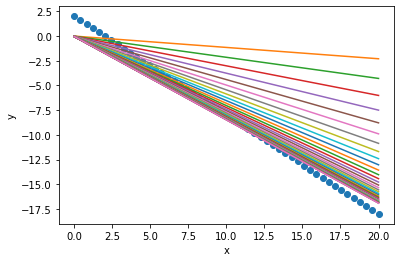

In [12]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(th0_list)):
    plt.plot(x,th0_list[i]+th1_list[i]*x)
    
    
plt.show()


Text(0, 0.5, 'y')

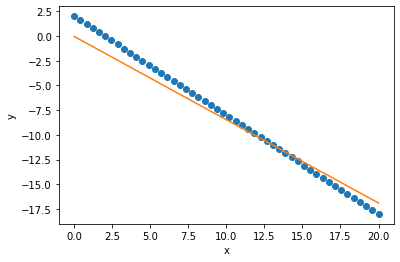

In [13]:
plt.plot(x,y,"o")
plt.plot(x,Y_predict)
plt.xlabel("x")
plt.ylabel("y")

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

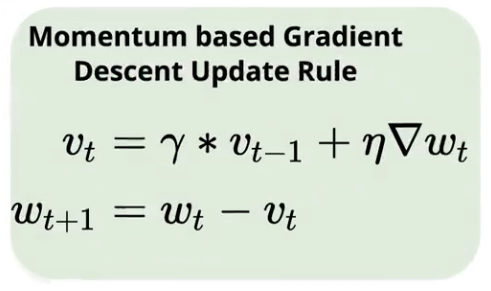

#### γ takes values between 0 and 1.
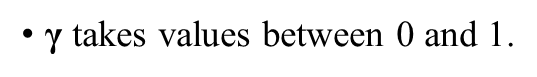

In [14]:
#vectorized implementation to Batch gradient Descent

def Momentum_GD(X,Y ,alpha=0.001, gama=0.001,Max_number_iterations=100):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    m0=0
    m1=0
   
    
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_number_iterations):
        print("==============================================================")
        print("epoch ",e)
        th0_list.append(theta_0)
        th1_list.append(theta_1)
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        m0=gama *m0 +alpha *Grad_theta_0
        m1=gama * m1 +alpha *Grad_theta_1
        
        theta_0 =theta_0 -m0

        theta_1= theta_1 -m1
        
    
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.001):
                break
        


    return Y_predict , theta_0 ,theta_1 , loss,th0_list,th1_list
    

In [15]:
y_hat,th0,th1,losses,list_th0 ,list_th1 = Momentum_GD(x,y,0.01,0.01,1000)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  6.673614538160126
epoch  2
Cost=  1.155047572616884
epoch  3
Cost=  0.5995958795357639
epoch  4
Cost=  0.5427386311742802
epoch  5
Cost=  0.5346868480246595
epoch  6
Cost=  0.5314114283930137
epoch  7
Cost=  0.528614924733496
epoch  8
Cost=  0.525877951136912
epoch  9
Cost=  0.5231595215048075
epoch  10
Cost=  0.5204555709693691
epoch  11
Cost=  0.5177656374359626
epoch  12
Cost=  0.5150896106736319
epoch  13
Cost=  0.5124274151197082
epoch  14
Cost=  0.5097789789290859
epoch  15
Cost=  0.5071442309526032
epoch  16
Cost=  0.5045231004405005
epoch  17
Cost=  0.5019155170117725
epoch  18
Cost=  0.49932141064947344
epoch  19
Cost=  0.4967407116985633
epoch  20
Cost=  0.49417335086401093
epoch  21
Cost=  0.4916192592089314
epoch  22
Cost=  0.4890783681527327
epoch  23
Cost=  0.48655060946927675
epoch  24
Cost=  0.48403591528504625
epoch  25
Cost=  0.4815342180773215
epoch  26
Cost=  0.47904545067236903
epoch  27
Cost=  0.4765695462436353
ep

epoch  158
Cost=  0.24172384190704133
epoch  159
Cost=  0.24047451341458204
epoch  160
Cost=  0.23923164196694596
epoch  161
Cost=  0.2379951941914628
epoch  162
Cost=  0.23676513688794618
epoch  163
Cost=  0.23554143702780192
epoch  164
Cost=  0.234324061753141
epoch  165
Cost=  0.23311297837589745
epoch  166
Cost=  0.23190815437695111
epoch  167
Cost=  0.2307095574052539
epoch  168
Cost=  0.22951715527696095
epoch  169
Cost=  0.22833091597456714
epoch  170
Cost=  0.22715080764604675
epoch  171
Cost=  0.22597679860399897
epoch  172
Cost=  0.22480885732479602
epoch  173
Cost=  0.22364695244773763
epoch  174
Cost=  0.2224910527742078
epoch  175
Cost=  0.22134112726683897
epoch  176
Cost=  0.2201971450486764
epoch  177
Cost=  0.21905907540235098
epoch  178
Cost=  0.21792688776925348
epoch  179
Cost=  0.21680055174871385
epoch  180
Cost=  0.21568003709718517
epoch  181
Cost=  0.21456531372743226
epoch  182
Cost=  0.21345635170772262
epoch  183
Cost=  0.21235312126102368
epoch  184
Cost=  

In [16]:
r2_score(y,y_hat)

0.9889062706787891

Text(0, 0.5, 'loss')

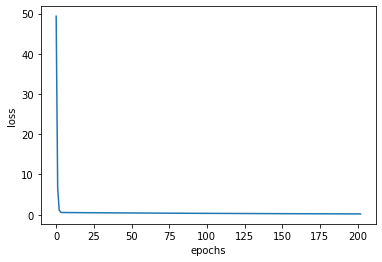

In [17]:
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")


Text(0, 0.5, 'loss')

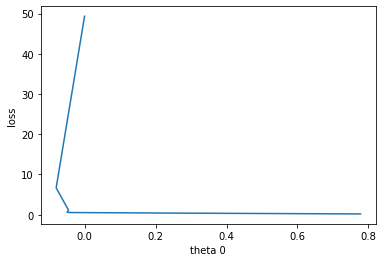

In [18]:
plt.plot(list_th0,losses)
plt.xlabel("theta 0")
plt.ylabel("loss")


Text(0, 0.5, 'loss')

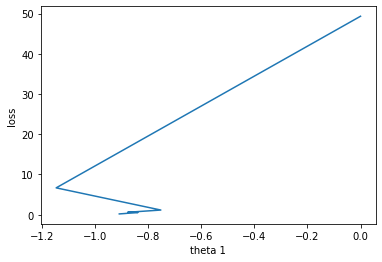

In [19]:
plt.plot(list_th1,losses)
plt.xlabel("theta 1")
plt.ylabel("loss")


Text(0, 0.5, 'y')

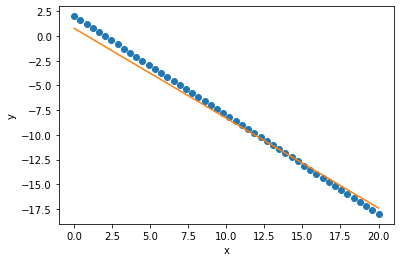

In [20]:
plt.plot(x,y,"o")
plt.plot(x,y_hat)
plt.xlabel("x")
plt.ylabel("y")

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [21]:
#try very large momentum term
y_hat_large,th0_large,th1_large,losses_large,list_th0_large ,list_th1_large = Momentum_GD(x,y,0.01,0.98,1000)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  6.673614538160126
epoch  2
Cost=  71.01009219757084
epoch  3
Cost=  8.517121879594244
epoch  4
Cost=  42.237706961844715
epoch  5
Cost=  46.88613735197961
epoch  6
Cost=  4.7741309275356745
epoch  7
Cost=  63.971484594100055
epoch  8
Cost=  9.204030320521676
epoch  9
Cost=  35.94352188214588
epoch  10
Cost=  44.32287618329301
epoch  11
Cost=  3.2620122208736837
epoch  12
Cost=  57.425284812228035
epoch  13
Cost=  9.742009634463928
epoch  14
Cost=  30.4008042271894
epoch  15
Cost=  41.711131909894256
epoch  16
Cost=  2.0888915056124615
epoch  17
Cost=  51.37670347325274
epoch  18
Cost=  10.15531287348731
epoch  19
Cost=  25.556144134548525
epoch  20
Cost=  39.10358981701227
epoch  21
Cost=  1.2171206339169964
epoch  22
Cost=  45.828380291549564
epoch  23
Cost=  10.46966665327703
epoch  24
Cost=  21.358991620427776
epoch  25
Cost=  36.54497710408598
epoch  26
Cost=  0.6122811045695343
epoch  27
Cost=  40.77491538742086
epoch  28
Cost=  10

In [22]:
r2_score(y,y_hat_large)

0.88516578291456

In [23]:
# try very small momentum term
y_hat_small,th0_small,th1_small,losses_small,list_th0_small ,list_th1_small = Momentum_GD(x,y,0.01,0.0001,1000)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  6.673614538160126
epoch  2
Cost=  1.3104656860728547
epoch  3
Cost=  0.6359697692387208
epoch  4
Cost=  0.549033143496625
epoch  5
Cost=  0.5357372355696001
epoch  6
Cost=  0.5316817000017693
epoch  7
Cost=  0.5287963230452455
epoch  8
Cost=  0.5260697456566956
epoch  9
Cost=  0.523375169932492
epoch  10
Cost=  0.5206966446159309
epoch  11
Cost=  0.5180321092076485
epoch  12
Cost=  0.5153812442053283
epoch  13
Cost=  0.5127439485885406
epoch  14
Cost=  0.5101201490273679
epoch  15
Cost=  0.5075097759723148
epoch  16
Cost=  0.5049127606564949
epoch  17
Cost=  0.5023290347183847
epoch  18
Cost=  0.4997585301529798
epoch  19
Cost=  0.4972011793041088
epoch  20
Cost=  0.4946569148619138
epoch  21
Cost=  0.4921256698609855
epoch  22
Cost=  0.4896073776785916
epoch  23
Cost=  0.4871019720329183
epoch  24
Cost=  0.4846093869813282
epoch  25
Cost=  0.4821295569186237
epoch  26
Cost=  0.47966241657532005
epoch  27
Cost=  0.47720790101592825
epoc

epoch  186
Cost=  0.2110790841313898
epoch  187
Cost=  0.2099989559446499
epoch  188
Cost=  0.2089243549606864
epoch  189
Cost=  0.20785525289584633
epoch  190
Cost=  0.20679162161120915
epoch  191
Cost=  0.20573343311184641
epoch  192
Cost=  0.20468065954608416
epoch  193
Cost=  0.20363327320477068
epoch  194
Cost=  0.2025912465205463
epoch  195
Cost=  0.20155455206711875
epoch  196
Cost=  0.20052316255854083
epoch  197
Cost=  0.19949705084849156
epoch  198
Cost=  0.19847618992956356
epoch  199
Cost=  0.19746055293254972
epoch  200
Cost=  0.1964501131257383
epoch  201
Cost=  0.19544484391420805
epoch  202
Cost=  0.19444471883912828
epoch  203
Cost=  0.19344971157706303


In [24]:
r2_score(y,y_hat_small)

0.9888481930973223

### Update your Batch GD for one variable  implementation to be NAG and check your results

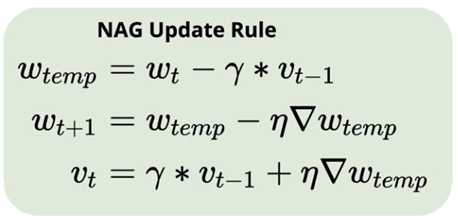

In [25]:

def NAG(X,Y ,alpha=0.001, gama=0.001,Max_number_iterations=100):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    m0=0
    m1=0
    theta_0_temp=0
    theta_1_temp=0
   
    
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_number_iterations):
        print("==============================================================")
        print("epoch ",e)
        th0_list.append(theta_0)
        th1_list.append(theta_1)
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)
        
        print("Cost= " , cost)
        
        
        
        #4. calculate theta_0-temp and theta_1_temp 
        
        theta_0_temp= theta_0 - gama * m0
        theta_1_temp = theta_1 - gama * m1
        
        h_theta_temp = theta_0_temp + theta_1_temp *X
        
         #5.Calculate gradient of theta_0_temp and theta_1_temp

        Grad_theta_0_temp = (h_theta_temp - Y).sum()/(len(X))
        Grad_theta1_temp = (np.dot( (h_theta_temp - Y ) ,X))/len(X)
        

        #6. Update the parameters (simultaneously).
        
        theta_0 =theta_0_temp - alpha * Grad_theta_0_temp

        theta_1= theta_1_temp - alpha * Grad_theta1_temp
        
        
        m0=gama * m0 - alpha *Grad_theta_0_temp
        m1=gama * m1 - alpha *Grad_theta1_temp
        
    
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.001):
                break
        


    return Y_predict , theta_0 ,theta_1 , loss,th0_list,th1_list
    

In [26]:
y_hat_NAG , th0_NAG , th1_NAG , loss_NAG , th0_list_NAG ,th1_list_NAG  =NAG(x,y,0.001,0.001,1000)

epoch  0
Cost=  49.34693877551021
epoch  1
Cost=  37.023388540217084
epoch  2
Cost=  27.820402159233613
epoch  3
Cost=  20.93924626347062
epoch  4
Cost=  15.794118802480794
epoch  5
Cost=  11.947024031604393
epoch  6
Cost=  9.070471480950184
epoch  7
Cost=  6.9195957335145435
epoch  8
Cost=  5.311310324315464
epoch  9
Cost=  4.108721060326699
epoch  10
Cost=  3.2094718220666696
epoch  11
Cost=  2.5370306912387814
epoch  12
Cost=  2.0341745672771183
epoch  13
Cost=  1.6581175993678843
epoch  14
Cost=  1.3768687032807327
epoch  15
Cost=  1.1665080678873185
epoch  16
Cost=  1.0091507924933154
epoch  17
Cost=  0.8914242935427562
epoch  18
Cost=  0.8033298579256085
epoch  19
Cost=  0.7373914236303526
epoch  20
Cost=  0.6880191209776444
epoch  21
Cost=  0.6510333908602338
epoch  22
Cost=  0.6233091667991402
epoch  23
Cost=  0.6025098290058313
epoch  24
Cost=  0.5868882811905833
epoch  25
Cost=  0.575138215210616
epoch  26
Cost=  0.5662829012875106
epoch  27
Cost=  0.5595920361835952
epoch  2

In [27]:
r2_score(y,y_hat_NAG)

0.9688572641010791

Text(0, 0.5, 'loss')

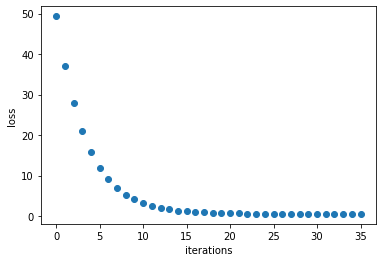

In [28]:
plt.plot(loss_NAG,"o")
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

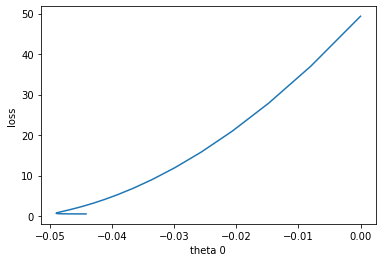

In [29]:
plt.plot(th0_list_NAG,loss_NAG)
plt.xlabel("theta 0")
plt.ylabel("loss")


Text(0, 0.5, 'loss')

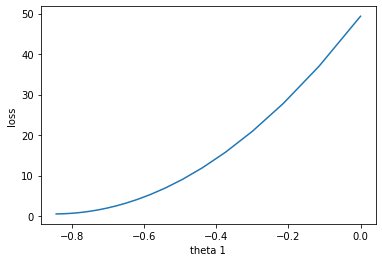

In [30]:
plt.plot(th1_list_NAG,loss_NAG)
plt.xlabel("theta 1")
plt.ylabel("loss")


Text(0, 0.5, 'y')

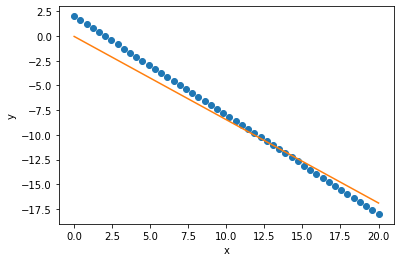

In [31]:
plt.plot(x,y,"o")
plt.plot(x,y_hat_NAG)
plt.xlabel("x")
plt.ylabel("y")

## Congratulations 
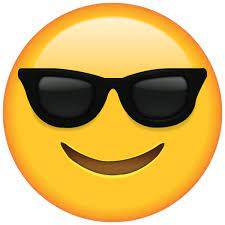